In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:


import pandas as pd
import numpy as np
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
# columns
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:


df.isnull().sum()


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [ ]:


df.duplicated().sum()


np.int64(0)

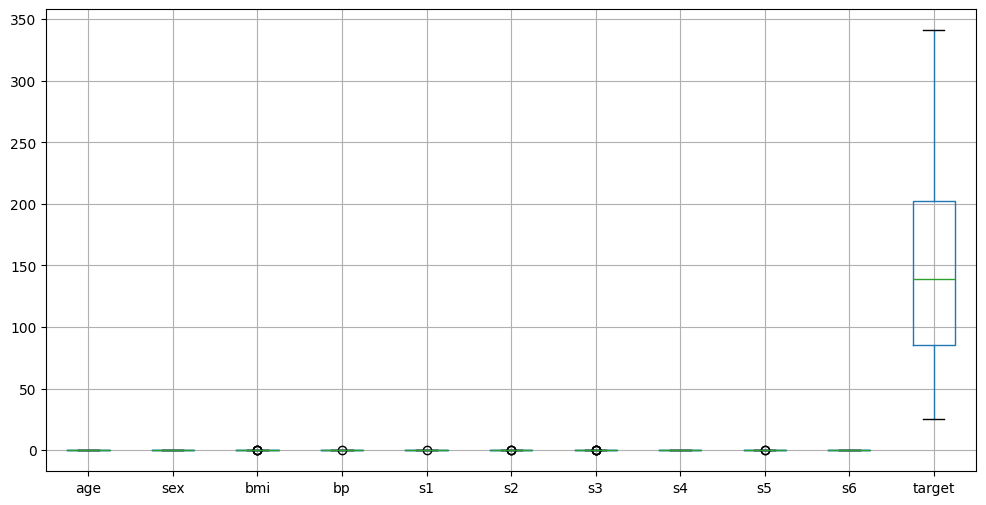

In [ ]:
import matplotlib.pyplot as plt



Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the DataFrame without outliers
df_no_outliers

df_no_outliers.boxplot(figsize=(12, 6))
plt.show()


In [ ]:


df_no_outliers.corr()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.175548,0.218316,0.332747,0.290889,0.254210,-0.108598,0.244203,0.294916,0.331997,0.199981
sex,0.175548,1.000000,0.044406,0.236720,0.021653,0.132765,-0.383055,0.333269,0.134441,0.177558,0.024965
bmi,0.218316,0.044406,1.000000,0.415839,0.238455,0.230992,-0.335251,0.374908,0.441466,0.352103,0.568104
bp,0.332747,0.236720,0.415839,1.000000,0.246225,0.190394,-0.169396,0.252725,0.381064,0.374811,0.437351
s1,0.290889,0.021653,0.238455,0.246225,1.000000,0.903646,0.060475,0.523832,0.485712,0.299779,0.198914
s2,0.254210,0.132765,0.230992,0.190394,0.903646,1.000000,-0.181719,0.653139,0.297595,0.270555,0.151457
s3,-0.108598,-0.383055,-0.335251,-0.169396,0.060475,-0.181719,1.000000,-0.750403,-0.410116,-0.240353,-0.382829
s4,0.244203,0.333269,0.374908,0.252725,0.523832,0.653139,-0.750403,1.000000,0.596846,0.356825,0.409703
s5,0.294916,0.134441,0.441466,0.381064,0.485712,0.297595,-0.410116,0.596846,1.000000,0.419098,0.558874
s6,0.331997,0.177558,0.352103,0.374811,0.299779,0.270555,-0.240353,0.356825,0.419098,1.000000,0.341035


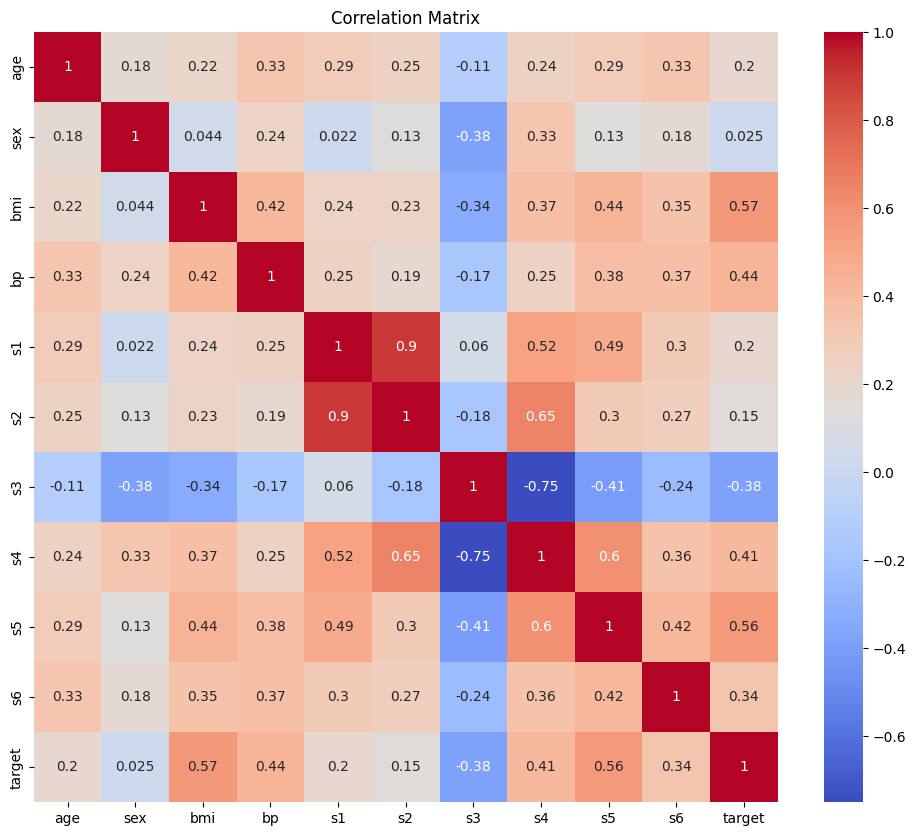

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:

df_dropped = df_no_outliers.drop(['age', 'sex', 's2'], axis=1)
df_dropped


,bmi,bp,s1,s3,s4,s5,s6,target
0,0.061696,0.021872,-0.044223,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.051474,-0.026328,-0.008449,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.044451,-0.005670,-0.045599,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.011595,-0.036656,0.012191,-0.036038,0.034309,0.022688,-0.009362,206.0
4,-0.036385,0.021872,0.003935,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...
436,-0.074108,-0.050427,-0.024960,0.092820,-0.076395,-0.061176,-0.046641,48.0
437,0.019662,0.059744,-0.005697,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.015906,-0.067642,0.049341,-0.028674,0.034309,-0.018114,0.044485,104.0
439,-0.015906,0.017293,-0.037344,-0.024993,-0.011080,-0.046883,0.015491,132.0


In [ ]:

from sklearn.model_selection import train_test_split

# Assuming 'target' is the column you want to predict
X = df_dropped.drop('target', axis=1)  # Features (all columns except 'target')
y = df_dropped['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (328, 7)
y_train shape: (328,)
X_test shape: (83, 7)
y_test shape: (83,)


In [ ]:


from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
train_x_scaled = scaler.fit_transform(X_train)

# Print the scaled training data
train_x_scaled

array([[0.53694581, 0.35676056, 0.60377358, ..., 0.70666667, 0.77415223,
        0.59615385],
       [0.18226601, 0.90140845, 0.64150943, ..., 0.45166667, 0.71878447,
        0.63461538],
       [0.83743842, 0.38028169, 0.56603774, ..., 0.46      , 0.59395794,
        0.63461538],
       ...,
       [0.49753695, 0.71830986, 0.77987421, ..., 0.33333333, 0.71878447,
        0.17307692],
       [0.39901478, 0.90140845, 0.66037736, ..., 0.33333333, 0.60160837,
        0.53846154],
       [0.06403941, 0.28169014, 0.28930818, ..., 0.16666667, 0.260079  ,
        0.05769231]])

In [ ]:

# Transform the test data using the fitted scaler
test_x_scaled = scaler.transform(X_test)

# Print the scaled test data
test_x_scaled


array([[ 0.25123153,  0.71830986,  0.47798742,  0.4       ,  0.33333333,
         0.55300146,  0.71153846],
       [ 0.12315271,  0.22535211,  0.2327044 ,  0.48333333,  0.16666667,
         0.260079  ,  0.13461538],
       [ 0.32019704,  0.45070423,  0.67295597,  0.41666667,  0.5       ,
         0.472156  ,  0.40384615],
       [ 0.72906404,  0.70422535,  0.57861635,  0.23333333,  0.5       ,
         0.895456  ,  0.78846154],
       [ 0.51724138,  0.66197183,  0.57232704,  0.38333333,  0.33333333,
         0.64658577,  0.53846154],
       [ 0.06896552,  0.29577465,  0.26415094,  0.26666667,  0.33333333,
         0.11578835,  0.28846154],
       [ 0.26108374,  0.36619718,  0.71069182,  0.7       ,  0.23333333,
         0.39091912,  0.26923077],
       [ 0.50246305,  0.70422535,  0.47169811,  0.31666667,  0.33333333,
         0.61399139,  0.48076923],
       [ 0.31527094,  0.42253521,  0.65408805,  0.45      ,  0.33333333,
         0.44183895,  0.55769231],
       [ 0.66502463,  0.4366

Now we will perform linear regression

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
le = LinearRegression()

In [ ]:


# Fit the model on the scaled training data
le.fit(train_x_scaled, y_train)

# Make predictions on the scaled test data
y_pred = le.predict(test_x_scaled)
y_pred


array([161.93233204,  74.31244834, 132.78877354, 275.29175936,
       200.12280149,  53.55062472,  95.1921806 , 201.33338869,
       122.90640197, 208.17909644,  94.59949262, 131.80068446,
       170.69256815, 111.2995737 ,  76.75607197, 200.69171791,
       226.12950743, 206.46098838, 213.87274151, 127.24161669,
       159.98708256, 177.19927268, 236.74874711, 193.864328  ,
       104.23517584,  70.95669564, 114.59079628,  79.31393038,
       197.71654597, 121.59492254, 132.7907881 , 172.97160535,
       209.53128297, 184.49492858, 177.7219978 , 218.15209366,
       216.81411026, 168.19258873, 108.8578426 , 259.48321154,
       209.12328236, 145.17770169, 143.04789539, 171.58565745,
       171.48166665, 150.09493728, 177.86088106, 275.32465188,
       222.20018483, 227.89412859,  78.5574556 ,  52.93932549,
        70.07546037,  73.04523631,  89.14582454, 176.4835351 ,
       166.74838039,  66.18324897, 206.50515784, 103.84889592,
       167.75793497,  87.22993517, 138.04953265, 126.83

In [ ]:


from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3269.480338783319
R-squared: 0.5043246103012883


In [ ]:


# Predict on the training data
y_pred_train = le.predict(train_x_scaled)

# Calculate R-squared for the training data
r2_train = r2_score(y_train, y_pred_train)

print(f"R-squared (Training): {r2_train}")


R-squared (Training): 0.46931881873635517


In [ ]:

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # Create polynomial features of degree 2
X_train_poly = poly.fit_transform(train_x_scaled)
X_test_poly = poly.transform(test_x_scaled)

# Now we will perform linear regression on the polynomial features
le = LinearRegression()
le.fit(X_train_poly, y_train)  # Fit the model on the polynomial features
y_pred = le.predict(X_test_poly)  # Make predictions on the polynomial features

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))
result = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
result


Mean Squared Error: 3783.3747904521865
R^2 Score: 0.42641472671111413


,Actual,Predict
183,185.0,138.507611
34,65.0,103.204318
73,111.0,130.583999
390,277.0,293.127230
399,232.0,213.587997
...,...,...
358,90.0,51.125648
5,97.0,133.243255
47,142.0,154.242169
98,92.0,168.139406


**so the first-order is better**

In [ ]:

y_train_pred = le.predict(X_train_poly)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R^2 Score: {train_r2}")



Train R^2 Score: 0.5268063477159386


In [ ]:
# prompt: apply lasso

from sklearn.linear_model import Lasso

# Initialize the Lasso model with an alpha value (regularization strength)
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value

# Fit the Lasso model on the training data
lasso_model.fit(train_x_scaled, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(test_x_scaled)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Mean Squared Error: {mse_lasso}")
print(f"Lasso R-squared: {r2_lasso}")


Lasso Mean Squared Error: 3273.685489316677
Lasso R-squared: 0.5036870809653144


In [ ]:
# prompt: apply ridge

from sklearn.linear_model import Ridge

# Initialize the Ridge model with an alpha value (regularization strength)
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value

# Fit the Ridge model on the training data
ridge_model.fit(train_x_scaled, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(test_x_scaled)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Mean Squared Error: {mse_ridge}")
print(f"Ridge R-squared: {r2_ridge}")


Ridge Mean Squared Error: 3263.169298027769
Ridge R-squared: 0.5052814068749835


In [ ]:
# prompt: apply elastic net

from sklearn.linear_model import ElasticNet

# Initialize the ElasticNet model with alpha and l1_ratio
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# Fit the ElasticNet model on the training data
elastic_net_model.fit(train_x_scaled, y_train)

# Make predictions on the test data
y_pred_elastic_net = elastic_net_model.predict(test_x_scaled)

# Evaluate the ElasticNet model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print(f"Elastic Net Mean Squared Error: {mse_elastic_net}")
print(f"Elastic Net R-squared: {r2_elastic_net}")


Elastic Net Mean Squared Error: 3659.2356775074563
Elastic Net R-squared: 0.4452350580205936
